In [ ]:
#Description: This program is used to predict the closing stock price of a corporation. 
#Using past 60 days stock price.

In [ ]:
#import my libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Get the stock quote
#df = web.DataReader('AAPL' , data_source = 'yahoo' , start='2015-01-01' , end='2022-01-01')
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2020-12-31']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
#Swoh Data
df 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.558947,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.615744,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.597117,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.609942,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.826750,3349298400
...,...,...,...,...,...,...,...
3519,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
3520,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100
3521,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200
3522,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676682,121047300


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(3524, 7)

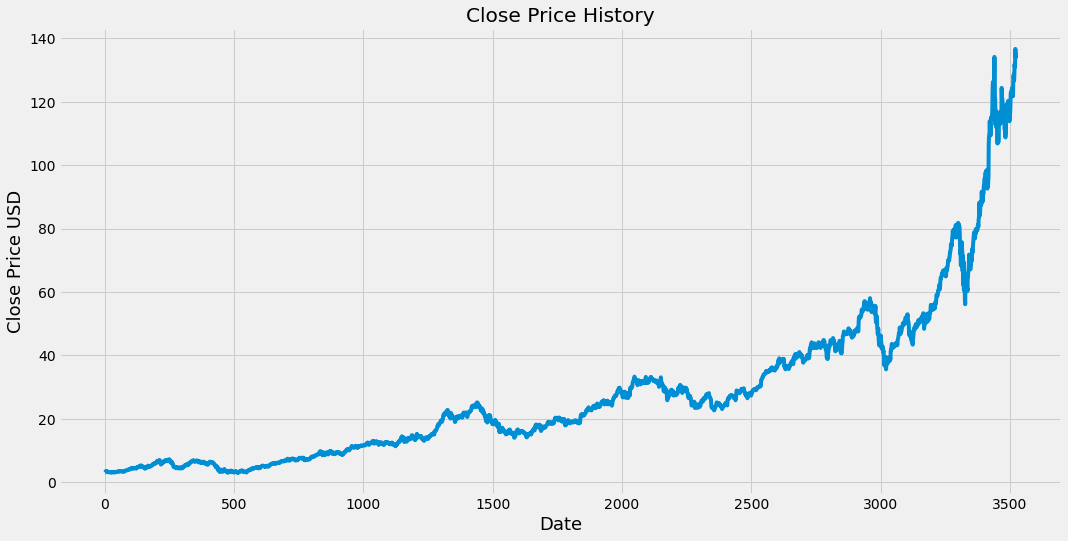

In [ ]:
#Visualize the closing price of the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model
training_data_lenght = math.ceil(len(dataset) * .8)

training_data_lenght

2820

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00149368],
       [0.0019898 ],
       [0.0018271 ],
       ...,
       [1.        ],
       [0.98640742],
       [0.97781879]])

In [ ]:
#Create the trainig data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_lenght , :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i  in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
      print(x_train)
      print(y_train)
      print()

[array([0.00149368, 0.0019898 , 0.0018271 , 0.00193912, 0.0038329 ,
       0.00501451, 0.00469444, 0.0043797 , 0.00504118, 0.00446771,
       0.00289934, 0.00274731, 0.00229121, 0.00200047, 0.0022672 ,
       0.00214717, 0.00191512, 0.00206449, 0.00196046, 0.00200847,
       0.00174441, 0.00174708, 0.00153103, 0.00158704, 0.0021205 ,
       0.0021285 , 0.00135232, 0.00178176, 0.00173374, 0.00189378,
       0.00186977, 0.00176842, 0.00205382, 0.00293402, 0.00301671,
       0.00289934, 0.00274998, 0.00152836, 0.00170974, 0.00236322,
       0.00192312, 0.00216584, 0.00266463, 0.00253926, 0.00261395,
       0.00260595, 0.00311273, 0.00272064, 0.00314741, 0.00303272,
       0.00303805, 0.00344881, 0.00354217, 0.00417965, 0.00420365,
       0.00408629, 0.00470777, 0.00460375, 0.00401161, 0.00414764])]
[0.003923586272134481]

[array([0.00149368, 0.0019898 , 0.0018271 , 0.00193912, 0.0038329 ,
       0.00501451, 0.00469444, 0.0043797 , 0.00504118, 0.00446771,
       0.00289934, 0.00274731, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2760, 60, 1)

In [ ]:
#Rebuild the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train,  batch_size= 1, epochs=1)

2760/2760 [==============================] - 83s 29ms/step - loss: 1.2208e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 2761 to 3524
test_data = scaled_data[training_data_lenght - 60: , :]

#Create the data sets
x_test = []
y_test = dataset[training_data_lenght:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3808853793726836

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

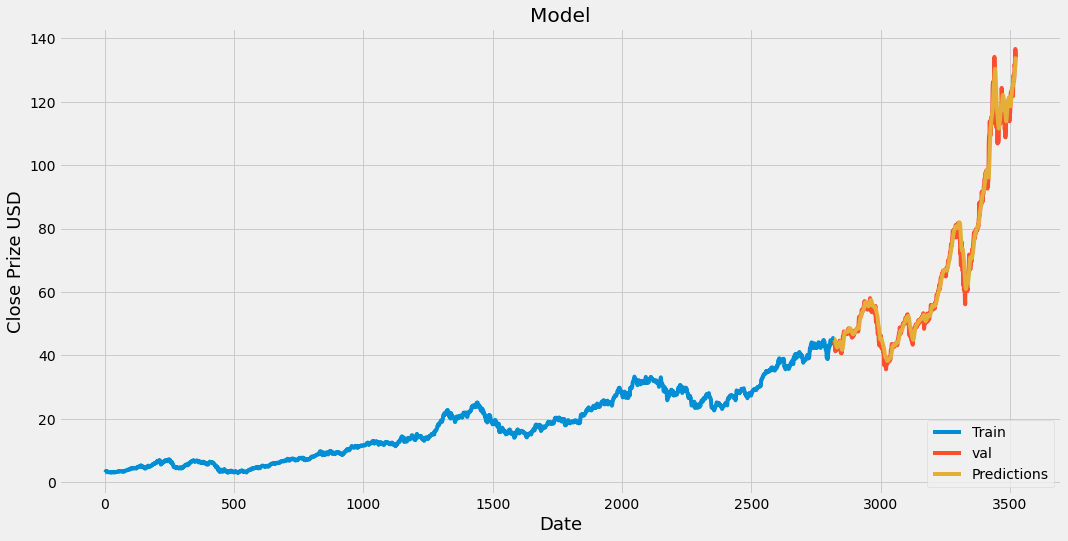

In [ ]:
#plot the data
train = data[:training_data_lenght]
valid = data[training_data_lenght:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prize USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'val', 'Predictions'], loc='lower right')
plt.show

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
2820,44.505001,45.142494
2821,43.825001,45.148651
2822,43.810001,45.052376
2823,42.817501,44.908352
2824,42.212502,44.643215
...,...,...
3519,130.960007,129.800812
3520,131.970001,130.744019
3521,136.690002,131.674362
3522,134.869995,133.059921


In [ ]:
#Get the quote
#apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-12-17')
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-3-7']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
apple_quote = pd.read_csv(url)

#Create a new dataframe
new_df = apple_quote.filter(["Close"])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []

#append the last 60 days 
X_test.append(last_60_days_scaled)

#Convert the X_test to numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get the predicted scaled price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


[[166.31078]]


In [ ]:
#Get quote 
start = pd.to_datetime(['2022-03-05']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-03-06']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
apple_quote2 = pd.read_csv(url)

print(apple_quote2['Close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


HTTPError: ignored